In [1]:
#1_Train_Random_Forest_Model_1.py
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
import joblib

#Loading data from MNIST dataset
def load_and_preprocess_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
    X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0
    return X_train, y_train, X_test, y_test

#training the random forest algorithm
def train_random_forest(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    return clf

def save_model(model, filename='random_forest_mnist.joblib'):
    joblib.dump(model, filename)

if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_and_preprocess_data()
    clf = train_random_forest(X_train, y_train)
    save_model(clf)


In [2]:
#2_Train_Random_Forest_Model_2.py
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
import joblib

#Loading model
def load_and_preprocess_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
    X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0
    return X_train, y_train, X_test, y_test

#training a differently tuned random forest model
def train_random_forest(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=150, min_samples_split=4, min_samples_leaf=2, max_features='sqrt', bootstrap=True, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    return clf

#Saving the model in a joblib file
def save_model(model, filename='random_forest_model_2_mnist.joblib'):
    joblib.dump(model, filename)

if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_and_preprocess_data()
    clf = train_random_forest(X_train, y_train)
    save_model(clf)


In [3]:
#3_Train_Logistic_Regression_Model.py
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import joblib

#Loading the MNIST dataset
def load_and_preprocess_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test

#Train the logistic regression algorithm
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=1000, tol=0.1)
    model.fit(X_train, y_train)
    return model

def save_model(model, filename='logistic_regression_mnist.joblib'):
    joblib.dump(model, filename)

if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_and_preprocess_data()
    model = train_logistic_regression(X_train, y_train)
    save_model(model)


In [10]:
#4_Test_All_Models_Kaggle_DataSet.py

import pandas as pd
import joblib
from sklearn.metrics import accuracy_score

# Function to load models
def load_model(file_name):
    return joblib.load(file_name)

# Load all models
models = {
    "Random Forest Model1": load_model('random_forest_mnist.joblib'),
    "Random Forest Model2": load_model('random_forest_model_2_mnist.joblib'),
    "Logistic Regression": load_model('logistic_regression_mnist.joblib')
}

# Load the CSV file into a DataFrame
df = pd.read_csv('train.csv')
actual_labels = df['label']
image_data = df.drop('label', axis=1)

# Convert DataFrame to NumPy array for consistency
image_data_np = image_data.to_numpy()

# Initialize a dictionary to store accuracies
accuracies = {}

# Calculate accuracies for each model
for name, model in models.items():
    predicted_labels = model.predict(image_data_np)  # Use the NumPy array here
    accuracy = accuracy_score(actual_labels, predicted_labels)
    accuracies[name] = accuracy

# Save and print accuracies for all models
with open('model_accuracies.txt', 'w') as file:
    for name, accuracy in accuracies.items():
        accuracy_info = f"{name} Model Accuracy: {accuracy * 100:.2f}%\n"
        print(accuracy_info, end='')
        file.write(accuracy_info)


Random Forest Model1 Model Accuracy: 98.46%
Random Forest Model2 Model Accuracy: 98.04%
Logistic Regression Model Accuracy: 83.96%


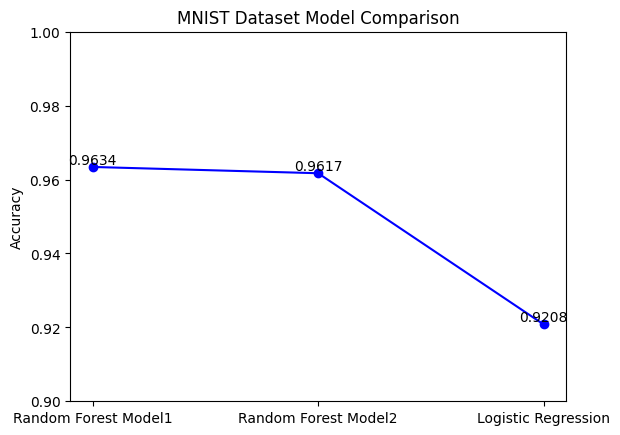

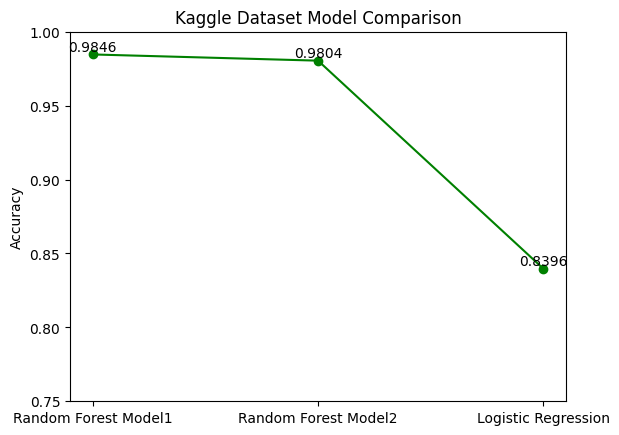

In [6]:
#5_Plot_Comparision_Graphs.py
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

def load_model(filename):
    return joblib.load(filename)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def preprocess_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X.reshape((X.shape[0], -1)))

def read_accuracies_from_file(file_path):
    accuracies = {}
    with open(file_path, 'r') as file:
        for line in file:
            name, accuracy_str = line.split('Model Accuracy: ')
            accuracies[name.strip()] = float(accuracy_str.strip().rstrip('%')) / 100
    return accuracies

def plot_comparison(X_test, y_test, kaggle_accuracies):
# Load models and evaluate on MNIST data
    models = ['Random Forest Model1', 'Random Forest Model2', 'Logistic Regression']
    model_files = ['random_forest_mnist.joblib', 'random_forest_model_2_mnist.joblib', 'logistic_regression_mnist.joblib']
    mnist_accuracies = []

    for file in model_files:
        model = load_model(file)
        accuracy = evaluate_model(model, X_test, y_test)
        mnist_accuracies.append(accuracy)

# Plotting MNIST dataset accuracies
    plt.plot(models, mnist_accuracies, marker='o', linestyle='-', color='blue')
    plt.ylabel('Accuracy')
    plt.title('MNIST Dataset Model Comparison')
    plt.ylim(0.9, 1)
    for model, acc in zip(models, mnist_accuracies):
        plt.text(model, acc, f'{acc:.4f}', ha='center', va='bottom')
    plt.show()

# Plotting Kaggle dataset 
    kaggle_accuracies_vals = [kaggle_accuracies[model] for model in models]
    plt.plot(models, kaggle_accuracies_vals, marker='o', linestyle='-', color='green')
    plt.ylabel('Accuracy')
    plt.title('Kaggle Dataset Model Comparison')
    plt.ylim(0.75, 1)
    for model, acc in zip(models, kaggle_accuracies_vals):
        plt.text(model, acc, f'{acc:.4f}', ha='center', va='bottom')
    plt.show()

if __name__ == "__main__":
# Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_test_preprocessed = preprocess_data(X_test)

# Read Kaggle accuracies from the file
    kaggle_accuracies = read_accuracies_from_file('model_accuracies.txt')

# Execute the comparison plot function
    plot_comparison(X_test_preprocessed, y_test, kaggle_accuracies)

Basic Information about Original MNIST Dataset:
Number of training samples: 60000
Number of testing samples: 10000
Shape of each image: (28, 28)
Number of unique labels: 10


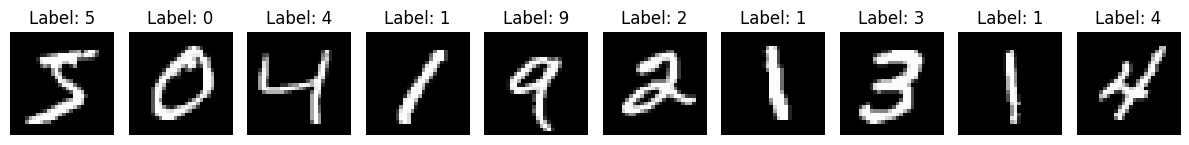

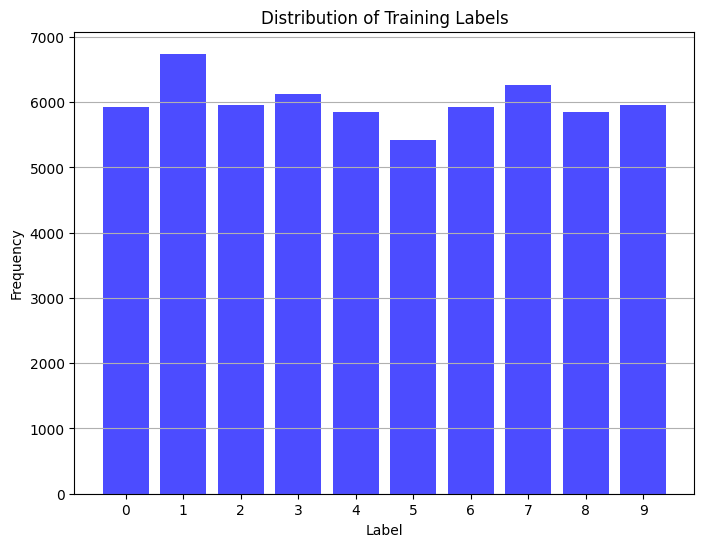

Detailed Information about Original MNIST Dataset:
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Unique labels in the dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Pixel values of the first image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0 

In [7]:
#6_Plot_MNIST_Dataset_Details.py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the original MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display basic information
print("Basic Information about Original MNIST Dataset:")
print("================================================")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")
print(f"Shape of each image: {X_train[0].shape}")
print(f"Number of unique labels: {len(np.unique(y_train))}")

# Show example images
fig, axes = plt.subplots(1, 10, figsize=(12, 4))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

# Display the distribution of the labels
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Distribution of Training Labels')
plt.xticks(np.arange(10))
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Display more detailed information
print("Detailed Information about Original MNIST Dataset:")
print("===================================================")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Unique labels in the dataset: {set(y_train)}")

# Displaying the pixel values of the first image
print("\nPixel values of the first image:")
print(X_train[0])


In [8]:
#7_CNN_LSTM_Model_train_MNIST.py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

def main():
# Load and preprocess MNIST dataset
    (X, y), (_, _) = mnist.load_data()
    X = X / 255.0  # Normalize pixel values to be between 0 and 1
    X = X.reshape((-1, 28, 28, 1))  # Add channel dimension for CNN
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN_Model_1 (Original CNN Model)
    CNN_Model_1 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

# Compile CNN_Model_1
    CNN_Model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN_Model_1
    history_model_1 = CNN_Model_1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)

# Print final training and validation accuracies
    print("CNN_Model_1 - Final Training Accuracy:", history_model_1.history['accuracy'][-1])
    print("CNN_Model_1 - Final Validation Accuracy:", history_model_1.history['val_accuracy'][-1])

# Save CNN_Model_1
    CNN_Model_1.save("CNN_Model_1.h5")

# LSTM_Model
    LSTM_Model = models.Sequential([
        layers.LSTM(64, input_shape=(28, 28), return_sequences=True),
        layers.LSTM(64),
        layers.Dense(10, activation='softmax')
    ])

# Compile LSTM_Model
    LSTM_Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM_Model
    history_lstm = LSTM_Model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)

# Print final training and validation accuracies
    print("LSTM_Model - Final Training Accuracy:", history_lstm.history['accuracy'][-1])
    print("LSTM_Model - Final Validation Accuracy:", history_lstm.history['val_accuracy'][-1])

# Save LSTM_Model
    LSTM_Model.save("LSTM_Model.h5")

# Save histories to a file for all models
    histories = {
        'CNN_Model_1': history_model_1.history,
        'LSTM_Model': history_lstm.history
    }

    with open('history.json', 'w') as f:
        json.dump(histories, f)

if __name__ == "__main__":
    main()





Epoch 1/10


1500/1500 [==============================] - 19s 11ms/step - loss: 0.1608 - accuracy: 0.9516 - val_loss: 0.0656 - val_accuracy: 0.9790
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0484 - val_accuracy: 0.9855
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0385 - val_accuracy: 0.9884
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0

C:\Users\mshiv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
1500/1500 [==============================] - 50s 28ms/step - loss: 0.4189 - accuracy: 0.8655 - val_loss: 0.1747 - val_accuracy: 0.9460
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.1294 - accuracy: 0.9608 - val_loss: 0.1111 - val_accuracy: 0.9664
Epoch 3/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0875 - accuracy: 0.9738 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 4/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0711 - accuracy: 0.9782 - val_loss: 0.0681 - val_accuracy: 0.9808
Epoch 5/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.0658 - val_accuracy: 0.9810
Epoch 6/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0685 - val_accuracy: 0.9801
Epoch 7/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0576 -

In [9]:
#8_CNN_LSTM_Model_Predict_Kaggle.py
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report

def load_and_predict(model_path, X):
    model = load_model(model_path)
    predictions = np.argmax(model.predict(X), axis=1)
    return predictions

def main():
# Load new data from CSV file
    data = pd.read_csv('data/train_orig.csv')

# Extract features and labels
    X_test = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
    y_test = data['label'].values

 # Load and predict using CNN_Model_1
    CNN_Model_1_predictions = load_and_predict('CNN_Model_1.h5', X_test)

# Print actual digit, predicted digit, and accuracy for CNN_Model_1
    cnn_accuracy = accuracy_score(y_test, CNN_Model_1_predictions)
    print("CNN_Model_1 Accuracy:", cnn_accuracy)
    print("CNN_Model_1 Classification Report:")
    print(classification_report(y_test, CNN_Model_1_predictions))

# Load and predict using LSTM_Model
    LSTM_Model_predictions = load_and_predict('LSTM_Model.h5', X_test.reshape(-1, 28, 28))

# Print actual digit, predicted digit, and accuracy for LSTM_Model
    lstm_accuracy = accuracy_score(y_test, LSTM_Model_predictions)
    print("LSTM_Model Accuracy:", lstm_accuracy)
    print("LSTM_Model Classification Report:")
    print(classification_report(y_test, LSTM_Model_predictions))

if __name__ == "__main__":
    main()

1313/1313 [==============================] - 6s 5ms/step
CNN_Model_1 Accuracy: 0.9955952380952381
CNN_Model_1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       0.99      1.00      1.00      4684
           2       1.00      0.99      1.00      4177
           3       1.00      0.99      1.00      4351
           4       1.00      0.99      0.99      4072
           5       1.00      0.99      1.00      3795
           6       0.99      1.00      1.00      4137
           7       0.99      0.99      0.99      4401
           8       1.00      1.00      1.00      4063
           9       0.99      0.99      0.99      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000

1313/1313 [==============================] - 19s 13ms/step
LSTM_Model Accuracy: 0.9899761904761905
LSTM_Mode